<!-- <div style="color:white; display:fill; border-radius:5px;background-color:#336b87;font-size:200%;font-family:sans-serif;letter-spacing:0.5px;text-align: center"> -->
<div style="color: white; 
            display: fill; 
            border-radius: 5px;
            background-color: #336b87;
            font-size: 200%;
            font-family: sans-serif;
            text-align: center">
Robi Datathon 2.0
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

plt.style.use("default")
import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

train.shape, test.shape

((28322, 36), (85065, 35))

In [3]:
train.head(2)

,id,gender,s11,s12,s13,s16,s17,s18,s48,s52,...,n7,n8,n9,n10,n11,n12,n13,n14,n15,label
0,b'gAAAAABinOicS09vrmgh0_JyEHihI13ptO0rCyHP7l76...,M,Y,N,1,D,D,B,0,1,...,-9.126056,1.732291,3.698504,4.804517,1.544484,0,0,0.631220,5,0
1,b'gAAAAABinOiWGC1WhR6WYP0DA5ssGv9rIekrWUwCdJ8F...,M,Y,Y,1,D,D,B,1,1,...,-9.098287,1.505885,6.791357,6.110416,1.712354,0,0,0.392746,3,1


<div style="color: white; 
            display: fill; 
            border-radius: 5px;
            background-color: #808080;
            font-size: 200%;
            font-family: sans-serif;
            text-align: left">
Robi Datathon 2.0
</div>

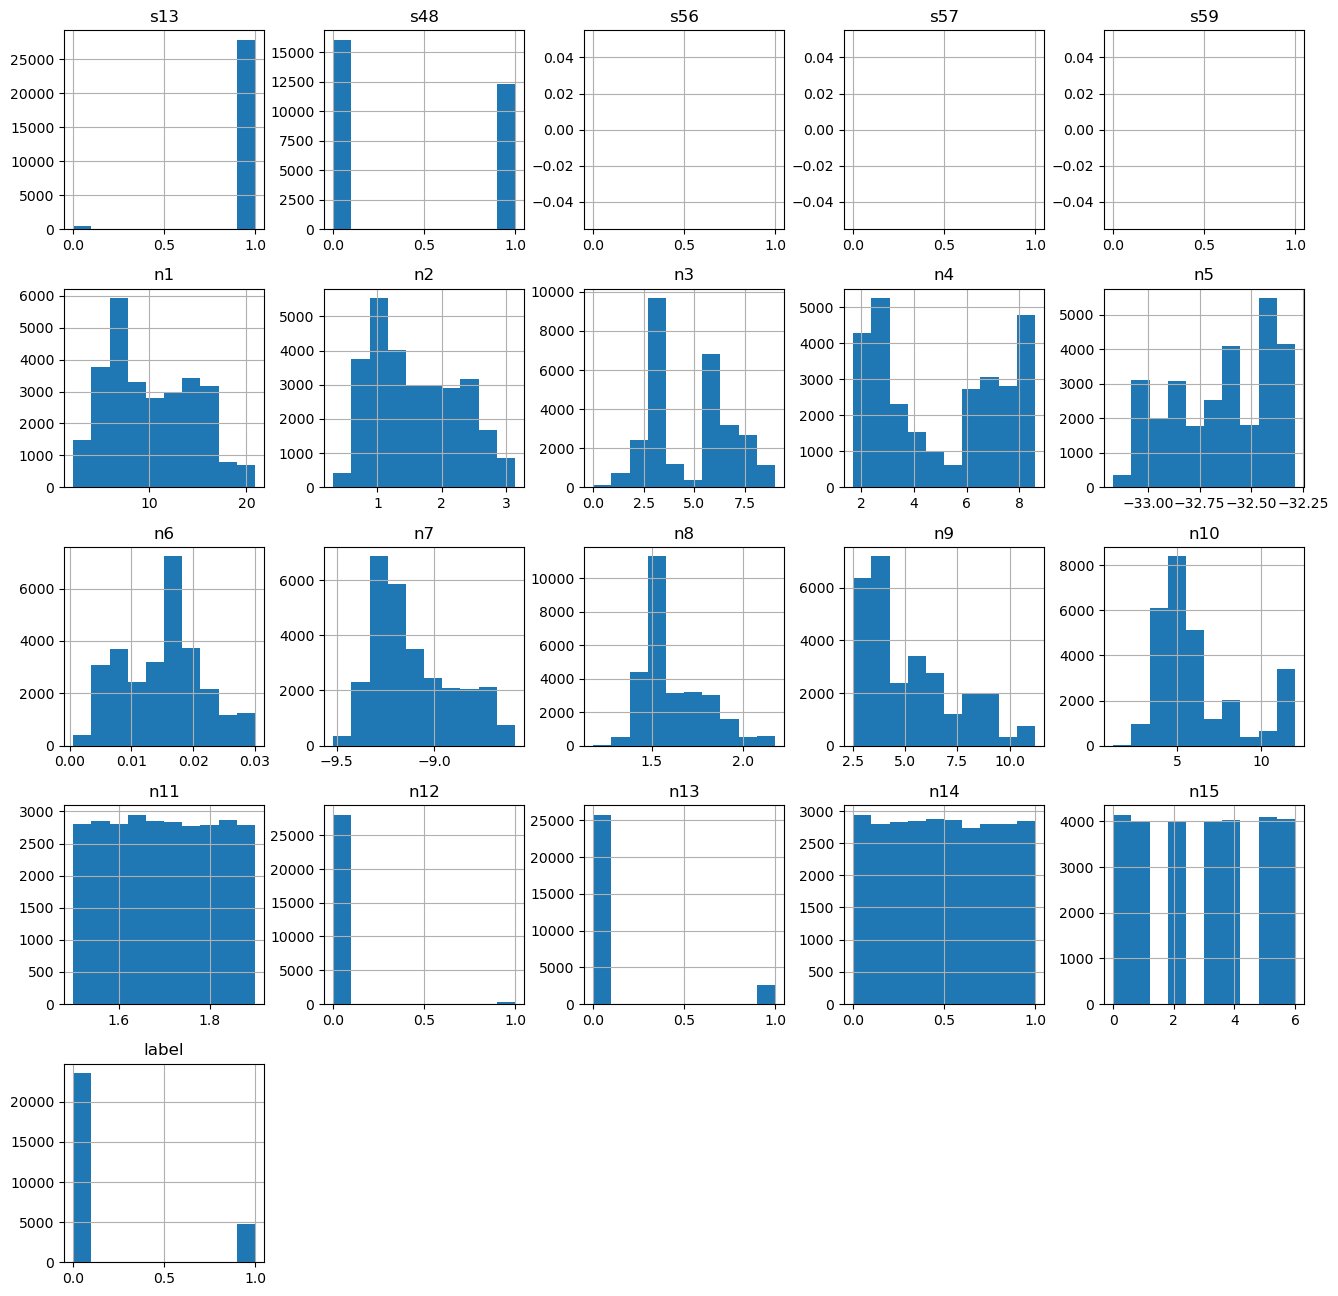

In [4]:
train.hist(figsize=(16,16))
plt.show()

In [4]:
train.select_dtypes(exclude=["object"]).columns

Index(['s13', 's48', 's56', 's57', 's59', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6',
       'n7', 'n8', 'n9', 'n10', 'n11', 'n12', 'n13', 'n14', 'n15', 'label'],
      dtype='object')

In [7]:
train.select_dtypes(exclude=["object"]).dtypes

s13        int64
s48        int64
s56      float64
s57      float64
s59      float64
n1       float64
n2       float64
n3         int64
n4       float64
n5       float64
n6       float64
n7       float64
n8       float64
n9       float64
n10      float64
n11      float64
n12        int64
n13        int64
n14      float64
n15        int64
label      int64
dtype: object

#### So, `s56, s57 & s59` columns contain 100% null value

In [9]:
train.isna().sum().sort_values(ascending=False)

s59       28322
s57       28322
s56       28322
s54       25694
s55       25116
id            0
n2            0
n4            0
n5            0
n6            0
n7            0
n8            0
n9            0
n10           0
n11           0
n12           0
n13           0
n14           0
n15           0
n3            0
s70           0
n1            0
s71           0
gender        0
s69           0
s58           0
s53           0
s52           0
s48           0
s18           0
s17           0
s16           0
s13           0
s12           0
s11           0
label         0
dtype: int64

In [5]:
missing_col = ["s54", "s55", "s56", "s57", "s59"]

for col in missing_col:
    print(f"{col} contains {(train[col].isna().sum()/len(train))*100:0.2f}% missing value")

s54 contains 90.72% missing value
s55 contains 88.68% missing value
s56 contains 100.00% missing value
s57 contains 100.00% missing value
s59 contains 100.00% missing value


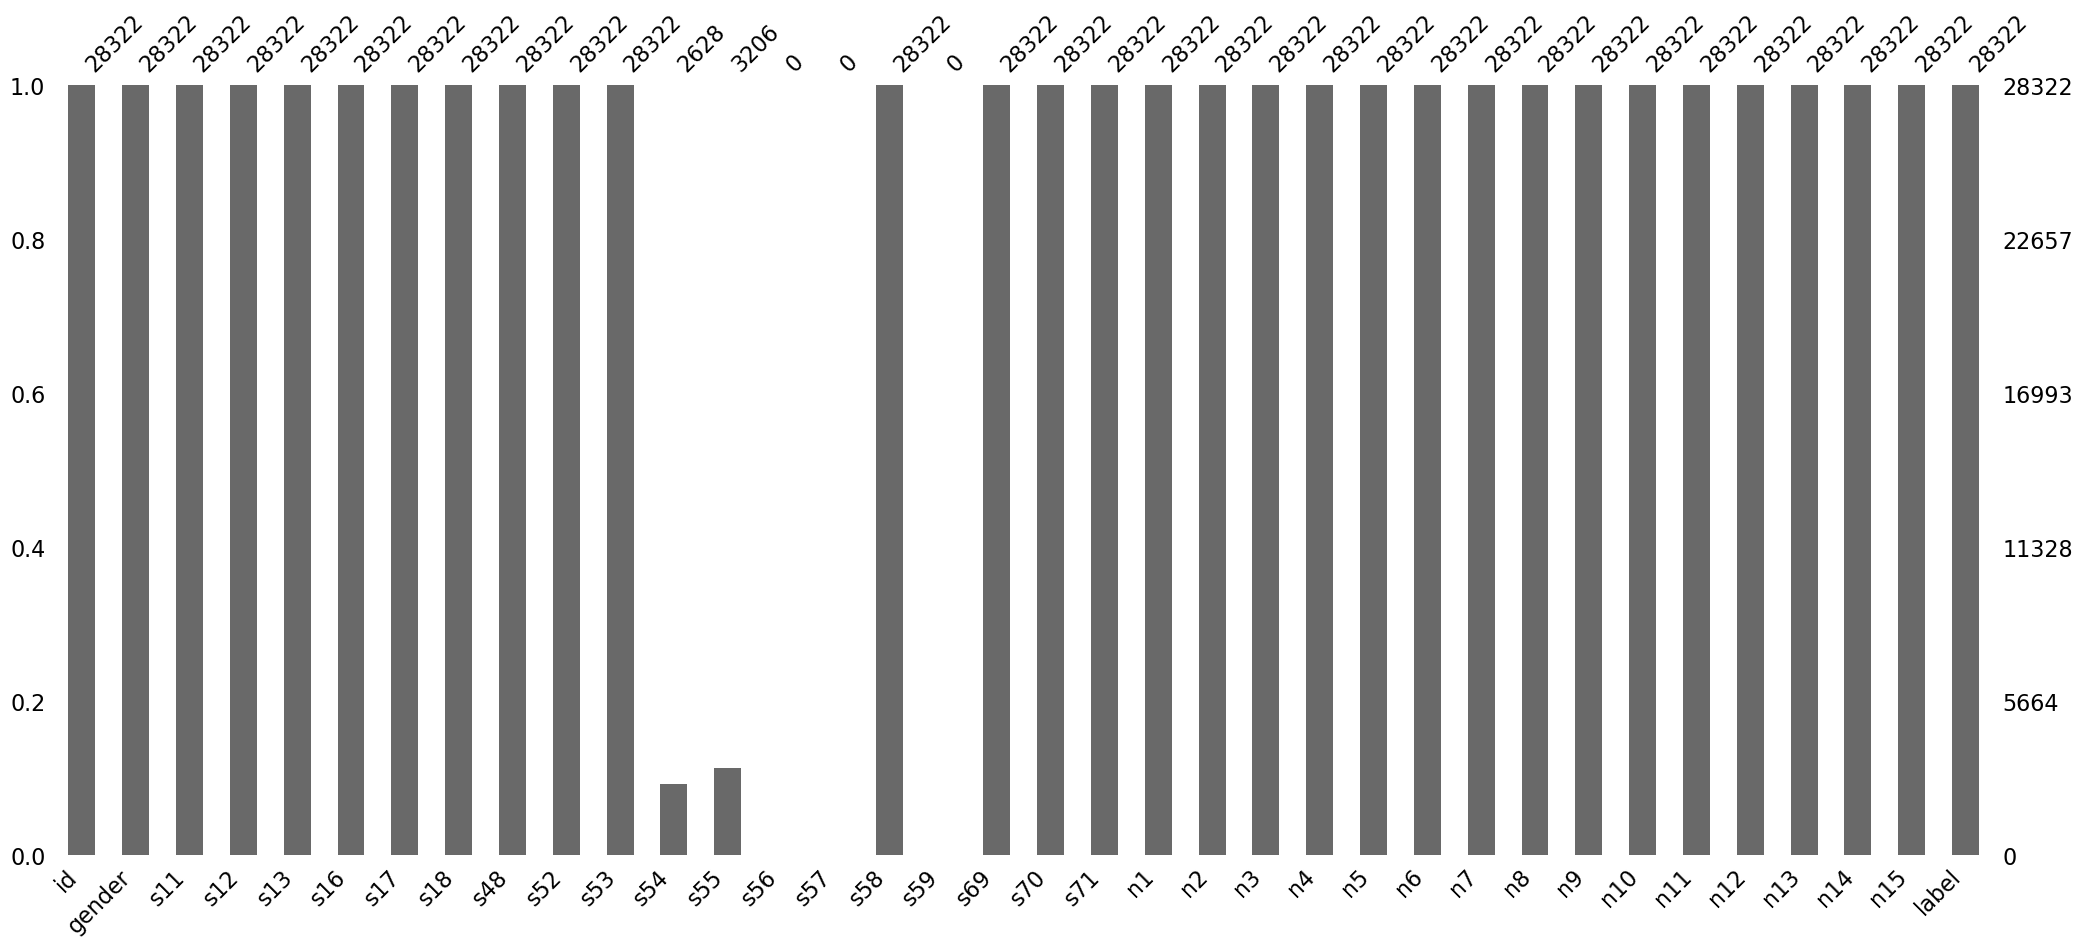

In [18]:
msno.bar(train);

In [19]:
print(train.shape) # (28322, 36)
np.product(train.shape) # 28322*36

(28322, 36)


1019592

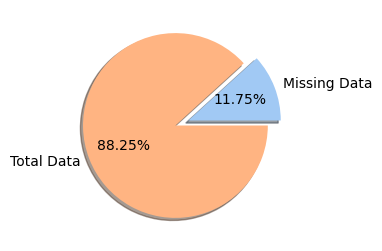

In [6]:
total_missing, total_cells = train.isna().sum().sum(), np.product(train.shape)
values = [total_missing, total_cells]
label = ["Missing Data", "Total Data"]

plt.figure(figsize=(3,3))
colors = sns.color_palette("pastel")
plt.pie(values, labels=label,
        autopct="%0.02f%%", shadow=True, explode=[0.15, 0], colors = colors);

In [7]:
cat_cols = train.select_dtypes(include=["object"]).columns
cat_cols

Index(['id', 'gender', 's11', 's12', 's16', 's17', 's18', 's52', 's53', 's54',
       's55', 's58', 's69', 's70', 's71'],
      dtype='object')

In [8]:
cat_cols=cat_cols[1:]

In [9]:
df_train = train.copy()

#convert object -> category
df_train[cat_cols] = df_train[cat_cols].apply(lambda x : x.astype("category"))

In [40]:
print(df_train["gender"][:5])
df_train.gender.cat.categories, df_train.gender.cat.codes[:5]

0    M
1    M
2    M
3    F
4    M
Name: gender, dtype: category
Categories (2, object): ['F', 'M']


(Index(['F', 'M'], dtype='object'),
 0    1
 1    1
 2    1
 3    0
 4    1
 dtype: int8)

In [41]:
# encoding
df_train[cat_cols] = df_train[cat_cols].apply(lambda x : x.cat.codes)

In [43]:
df_train[cat_cols].head(5)

,gender,s11,s12,s16,s17,s18,s52,s53,s54,s55,s58,s69,s70,s71
0,1,1,0,3,3,1,1,1,-1,7,1,2,3,1
1,1,1,1,3,3,1,1,1,-1,-1,1,2,3,1
2,1,1,1,3,3,1,1,1,-1,-1,1,2,3,1
3,0,1,1,3,3,1,1,1,-1,-1,1,2,3,1
4,1,0,1,1,3,3,2,1,-1,-1,1,3,3,3


** Missing values code is `-1`

### Drop irrelevalent columns

In [44]:
print(f"Before: {df_train.shape}")
drop_cols = ["id", "s54", "s55", "s56", "s57", "s59", "label"]
df_train.drop(drop_cols, axis=1, inplace=True)
print(f"After: {df_train.shape}")

Before: (28322, 36)
After: (28322, 29)


### Correlation

<div style="color: black; 
            display: fill; 
            border-radius: 5px;
            background-color: yellow;
            font-size: 150%;
            font-family: cursive;
            text-align: left">
Correlation Heatmap - 1
</div>

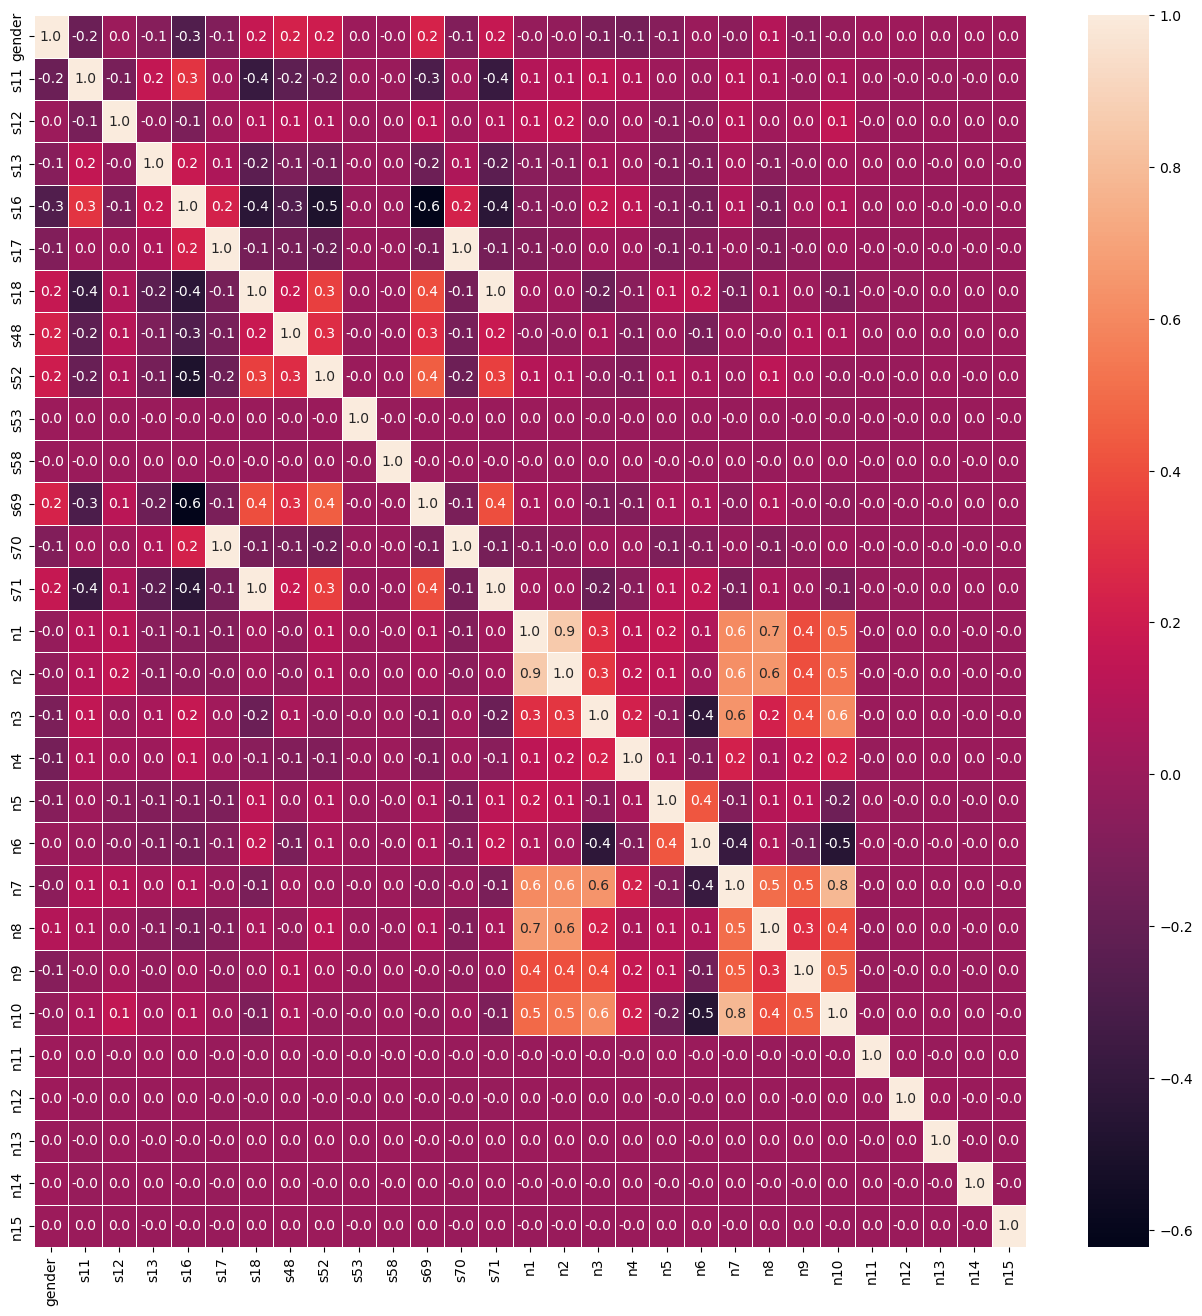

In [49]:
plt.figure(figsize = (16,16))
sns.heatmap(df_train.corr(), annot=True, linewidth=.5, fmt= ".1f");

<div style="color: black; 
            display: fill; 
            border-radius: 5px;
            background-color: yellow;
            font-size: 150%;
            font-family: cursive;
            text-align: left">
Correlation Heatmap - 2
</div>

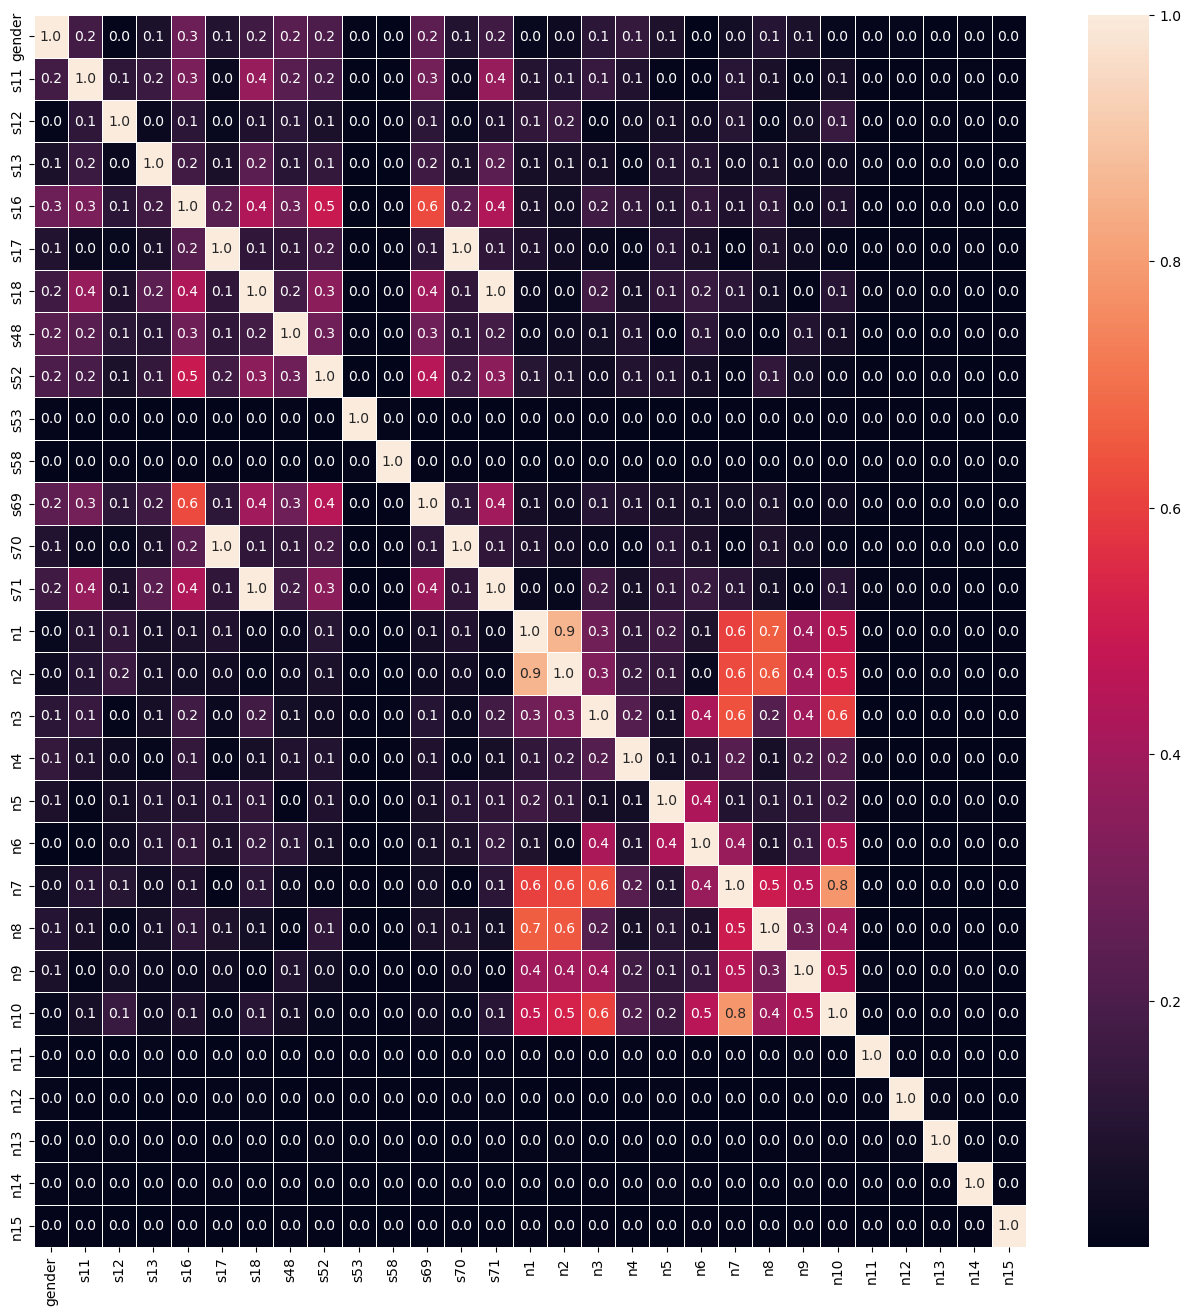

In [50]:
plt.figure(figsize = (16,16))
sns.heatmap(df_train.corr().abs(), annot=True, linewidth=.5, fmt= ".1f");

#### How to drop out highly correlated features: https://www.projectpro.io/recipes/drop-out-highly-correlated-features-in-python

<div style="color: black; 
            display: fill; 
            border-radius: 5px;
            background-color: yellow;
            font-size: 150%;
            font-family: cursive;
            text-align: left">
Correlation Heatmap - 3
</div>

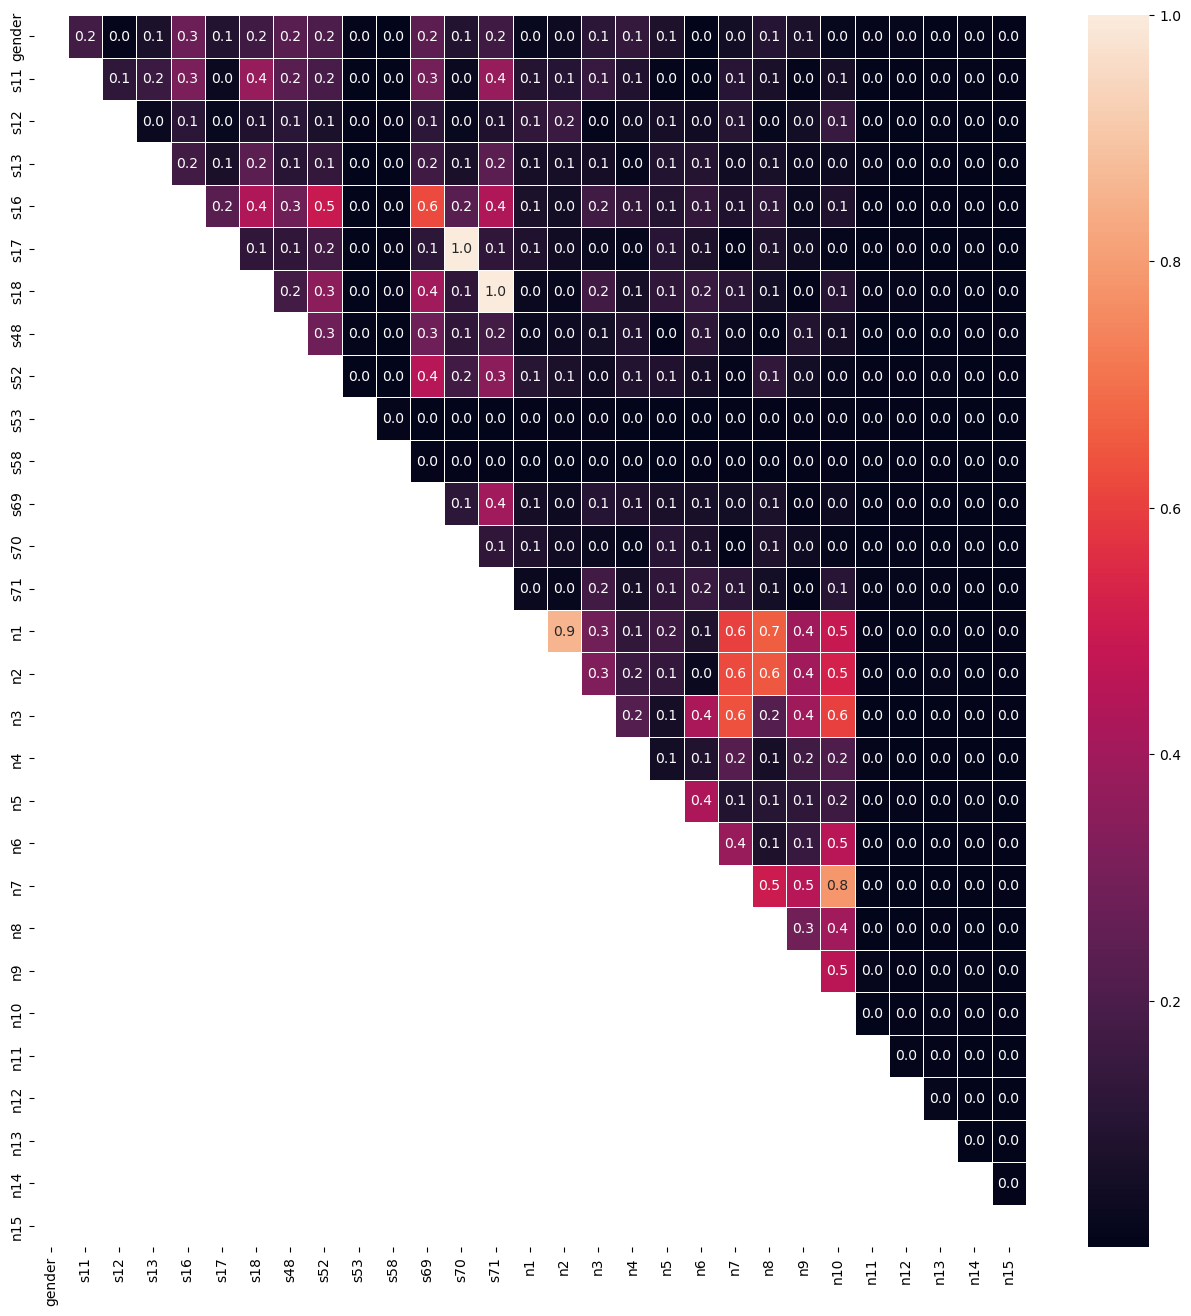

In [60]:
corr_mat = df_train.corr().abs()
upper_tri = corr_mat.where(np.triu(np.ones(corr_mat.shape), k=1).astype(np.bool))

plt.figure(figsize = (16,16))
sns.heatmap(upper_tri, annot=True, linewidth=.5, fmt= ".1f");

In [61]:
to_drop = [col for col in upper_tri.columns if any(upper_tri[col] > 0.70)]
print(to_drop)

['s70', 's71', 'n2', 'n10']


<div style="color: black; 
            display: fill; 
            border-radius: 5px;
            background-color: yellow;
            font-size: 150%;
            font-family: cursive;
            text-align: left">
Correlation Heatmap - 4
</div>

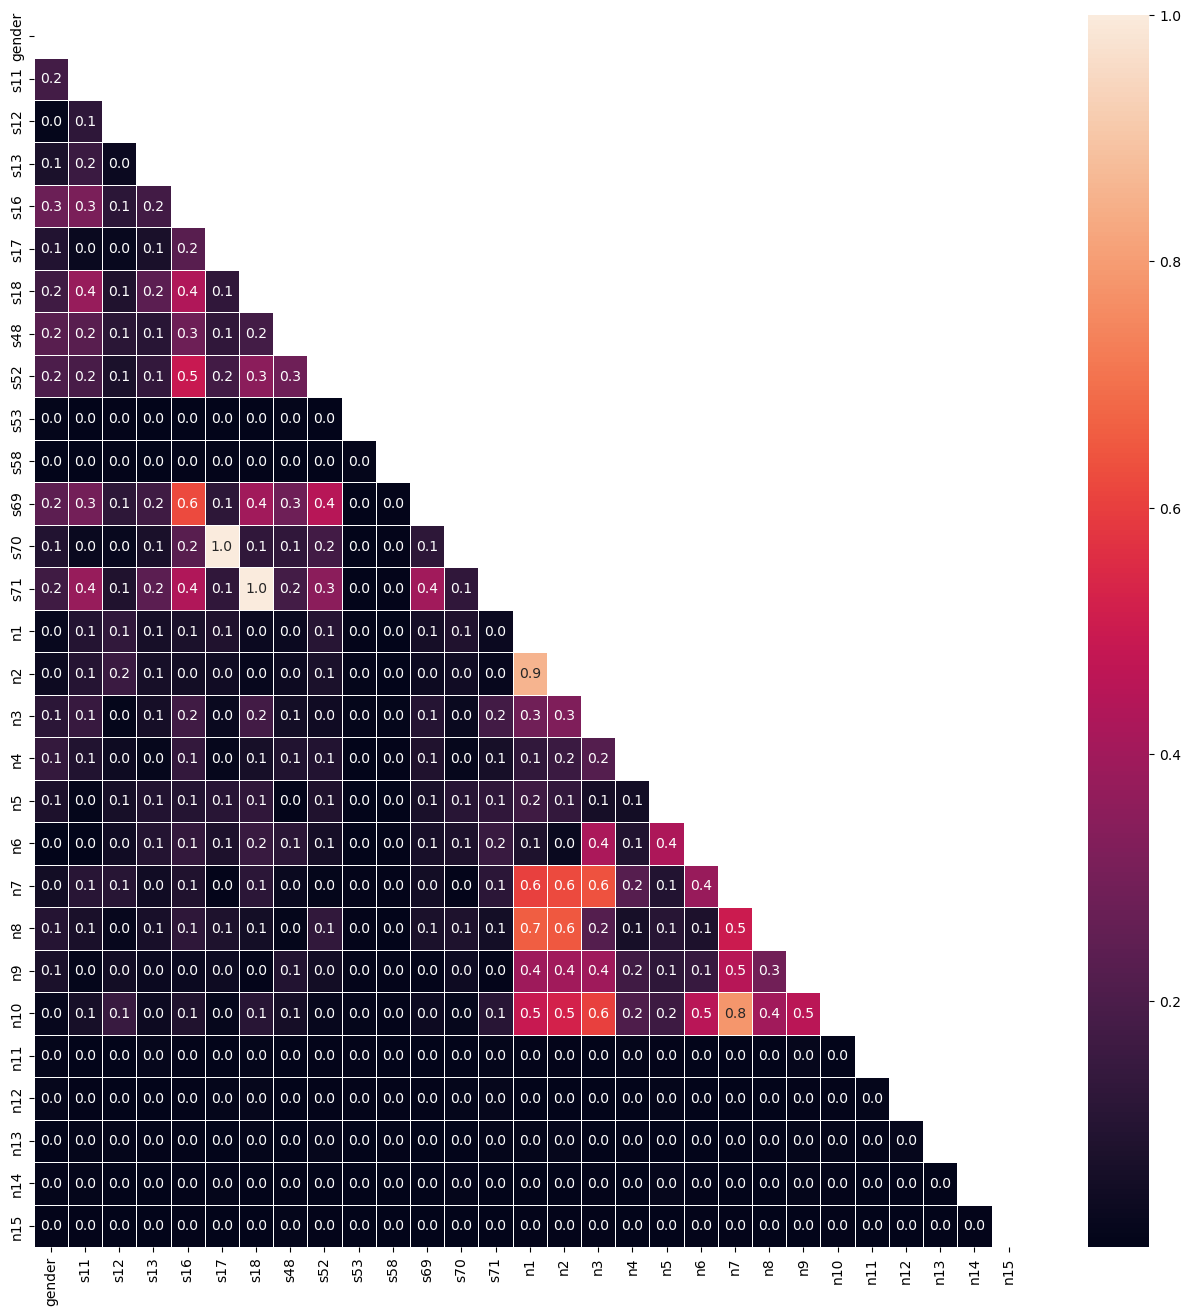

In [64]:
corr_mat = df_train.corr().abs()
mask = np.triu(np.ones_like(corr_mat))

plt.figure(figsize = (16,16))
sns.heatmap(corr_mat, annot=True, linewidth=.5, fmt= ".1f", mask=mask);

In [65]:
print("Before: ", df_train.shape)
df_train.drop(to_drop, axis=1, inplace=True)
print("After: ", df_train.shape)

Before:  (28322, 29)
After:  (28322, 25)
